In [48]:
import mlrose_hiive as mr
from mlrose_hiive.decorators import short_name
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
sns.set_style("whitegrid")

In [18]:
#Queen
#define
def fitness_max(state):
    attacks_list = []
    for i in range(len(state)-1):
        for j in range(i+1, len(state)):
            # check for attacking pairs
            if (state[j] ==  state[i]) \
                or (state[j] == state[i] + (j-i)) \
                or (state[j] == state[i] - (j-i)):
                attacks_list+=[i,j]
    fitness_cnt = len(state) - len(set(attacks_list))

    return fitness_cnt

In [19]:
fitness_cust = mr.CustomFitness(fitness_max)

In [20]:
problem = mr.DiscreteOpt(length = 64,
                         fitness_fn = fitness_cust,
                         maximize = True,
                         max_val = 64)

In [37]:
start_time = time.perf_counter()
rhc_best_state, rhc_best_fitness, rhc_curve = mr.random_hill_climb(problem = problem,
                           max_attempts = 1000,
                           curve = True,
                           random_state = 42,
                           restarts = 5,
                           max_iters=1000
                           )
rhc_time = time.perf_counter() - start_time
print("RHC best fitness: {0:.0f} in {1:.4f} seconds and {2} iterations".format(rhc_best_fitness, rhc_time, len(rhc_curve)))

RHC best fitness: 47 in 16.3864 seconds and 1000 iterations


try different schedule and number of iterations

In [44]:
sa_schedule = mr.ExpDecay()
start_time = time.perf_counter()
sa_best_state, sa_best_fitness, sa_curve = mr.simulated_annealing(problem,
                                                                      schedule=sa_schedule,
                                                                      max_attempts=1000,
                                                                      max_iters=1000,
                                                                      curve=True,
                                                                      random_state=42)
sa_time = time.perf_counter() - start_time
print("SA best fitness: {0:.0f} in {1:.4f} seconds and {2} iterations".format(sa_best_fitness, sa_time, len(sa_curve)))

In [ ]:
# ga
ga_max_attempts = 1000
ga_max_iters = 1000
ga_pop_size = 200
ga_mutation_prob = 0.2
start_time = time.perf_counter()
ga_best_state, ga_best_fitness, ga_curve = mr.genetic_alg(problem,
                                                              pop_size=ga_pop_size,
                                                              mutation_prob=ga_mutation_prob,
                                                              max_attempts=ga_max_attempts,
                                                              max_iters=ga_max_iters,
                                                              curve=True,
                                                              random_state=42)
ga_time = time.perf_counter() - start_time
print("GA fitness {0:.0f} in {1:.4f} seconds and {2} iterations".format(ga_best_fitness, ga_time, len(ga_curve)))
# print('GA best state:\n', ga_best_state)

In [35]:
#mimic
mimic_max_attempts = 1000
mimic_max_iters = 1000
mimic_pop_size = 200
mimic_keep_pct = 0.5
start_time = time.perf_counter()
mimic_best_state, mimic_best_fitness, mimic_curve = mr.mimic(problem,
                                                                 pop_size=mimic_pop_size,
                                                                 keep_pct=mimic_keep_pct,
                                                                 max_attempts=mimic_max_attempts,
                                                                 max_iters=mimic_max_iters,
                                                                 curve=True,
                                                                 random_state=42,
                                                                 )
mimic_time = time.perf_counter() - start_time
print("MIMIC fitness {0:.0f} in {1:.4f} seconds and {2} iterations".format(mimic_best_fitness, mimic_time, len(mimic_curve)))

MIMIC fitness 16 in 2552.7532 seconds and 1000 iterations


In [49]:
df = pd.DataFrame({'RHC':[x[0] for x in rhc_curve],
                   'SA': [x[0] for x in sa_curve],
                   'GA': [x[0] for x in ga_curve],
                   'MIMIC': [x[0] for x in mimic_curve]})


Text(0, 0.5, 'Fitness')

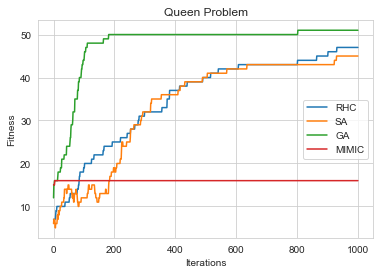

In [53]:
ax = df.plot(title = 'Queen Problem')
ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')

In [80]:
sa_schedule = mr.ExpDecay()
curves = []
timer = []
for i in (1000,5000, 10000):
    start_time = time.perf_counter()
    sa_best_state, sa_best_fitness, sa_curve = mr.simulated_annealing(problem,
                                                                          schedule=sa_schedule,
                                                                          max_attempts=1000,
                                                                          max_iters=i,
                                                                          curve=True,
                                                                          random_state=None)
    curves.append([x[0] for x in sa_curve])
    sa_time = time.perf_counter() - start_time
    timer.append(sa_time)


In [81]:
df = pd.DataFrame({
    'iter_1000': curves[0] + (10000-1000) * [None] ,
    'iter_5000': curves[1] + (10000-5000) * [None],
    'iter_10000':curves[2]
})

In [83]:
timer

[3.46978842200042, 13.387116580999646, 28.42596470799981]

Text(0, 0.5, 'Fitness')

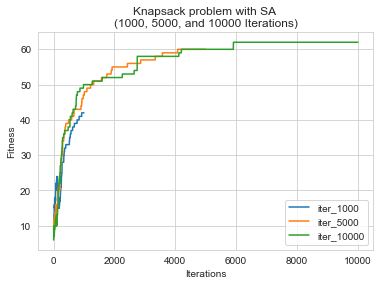

In [87]:
ax = df.plot(title = 'Knapsack problem with SA \n'
                     '(1000, 5000, and 10000 Iterations)')
ax.set_xlabel('Iterations')
ax.set_ylabel('Fitness')